## Email Spam Detection with Machine Learning 

Business Problem:
The business problem is to detect and classify emails as spam or non-spam (ham). Spam emails, also known as junk mail, are a nuisance to users and can potentially contain harmful content such as scams or phishing attempts. Detecting spam emails accurately is crucial to ensuring the safety and security of users' email accounts.

Business Insight:
By developing an email spam detector using machine learning, businesses can automatically filter out spam emails from users' inboxes, thus improving the overall email experience and reducing the risk of users falling victim to scams or phishing attacks. This can lead to increased user satisfaction, trust, and engagement with the email platform.

Business Objective:
The primary business objective is to develop an accurate email spam detection system that can effectively distinguish between spam and non-spam emails. This system should minimize false positives (classifying non-spam emails as spam) and false negatives (classifying spam emails as non-spam) to ensure that users receive only relevant and safe emails in their inbox.

In [1]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [2]:
#Load the dadtaset 
spam = pd.read_csv(r"C:\Users\kashinath konade\Downloads\spam.csv")
print(spam)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [3]:
# Display the first few rows of the dataset 
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
spam.shape

(5572, 2)

In [5]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
spam.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# Checking the missing value 
spam.isnull().count()

Category    5572
Message     5572
dtype: int64

In [8]:
# Checking the duplicated value 
spam.duplicated().count()

5572

In [9]:
# Here the total 747 spam email
spam['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

#### Data Visualisation

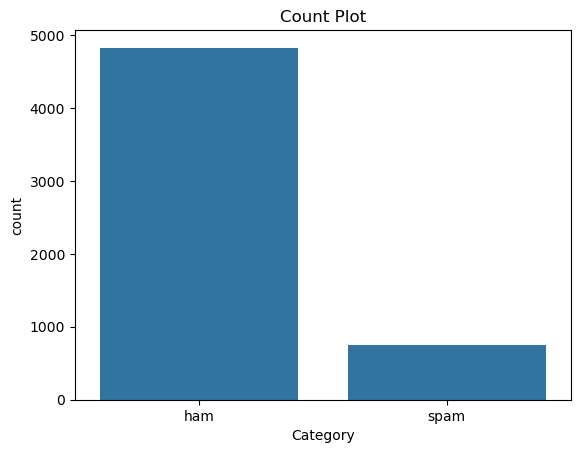

In [10]:
sns.countplot(data=spam, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Count Plot')
plt.show()

### Data Preprocessing

In [11]:
spam.loc[spam["Category"] == "spam", "Category"] = 0
spam.loc[spam["Category"] == "ham", "Category"] = 1

spam.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Separate the feature (v2) and target (category) data
X=spam['Category']
y=spam['Category']

In [13]:
X

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [14]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [20]:
spam['Spam']=spam['Category'].apply(lambda x:1 if x=='spam' else 0)
spam.head(5)

,Category,Message,Spam
0,1,"Go until jurong point, crazy.. Available only ...",0
1,1,Ok lar... Joking wif u oni...,0
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,1,U dun say so early hor... U c already then say...,0
4,1,"Nah I don't think he goes to usf, he lives aro...",0


### Split Data to Train and Test Data

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(spam.Message,spam.Spam,test_size=0.25)

In [23]:
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

### Tarining The Model

In [24]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [31]:
emails=[
    'Finally the match heading towards draw as your prediction.',
    'Text & meet someone sexy today. U can find a date or even flirt its up to U. Join 4 just 10p. REPLY with NAME & AGE eg Sam 25. 18 -msg recd@thirtyeight pence'
]


In [32]:
clf.predict(emails)

array([0, 0], dtype=int64)

In [33]:
emails

['Finally the match heading towards draw as your prediction.',
 'Text & meet someone sexy today. U can find a date or even flirt its up to U. Join 4 just 10p. REPLY with NAME & AGE eg Sam 25. 18 -msg recd@thirtyeight pence']

In [34]:
#Prediction Of Model
clf.score(X_test,y_test)

1.0